<a href="https://colab.research.google.com/github/Mikeyjud401/Mikeyjud401-/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: We have three speparate data types. Float(decimal component) integer(whole number without a fractional component), and object(string or character data type). Consisting of one float, four integers, and four objects.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: No missing values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe() .T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: The minimum time it takes for food to be prepared once an order is placed is 20 minutes. The average is 27 minutes. The maximum time is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations: A sum of 736 orders are not given a rating. 3 is the lowest rating and 5 is the highest rating.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# Write the code here
df['order_id'].nunique()

1898

In [ ]:
df['customer_id'] .nunique()

1200

1898 unique order IDs from 1200 unique customer IDs. Repeat customers. Customers who placed more than one order.

In [ ]:
df['restaurant_name'].nunique()

178

In [ ]:
df['cuisine_type'].nunique()

14

There are 178 unique restaurant names and 14 unique cuisine types.

<Axes: xlabel='cuisine_type', ylabel='count'>

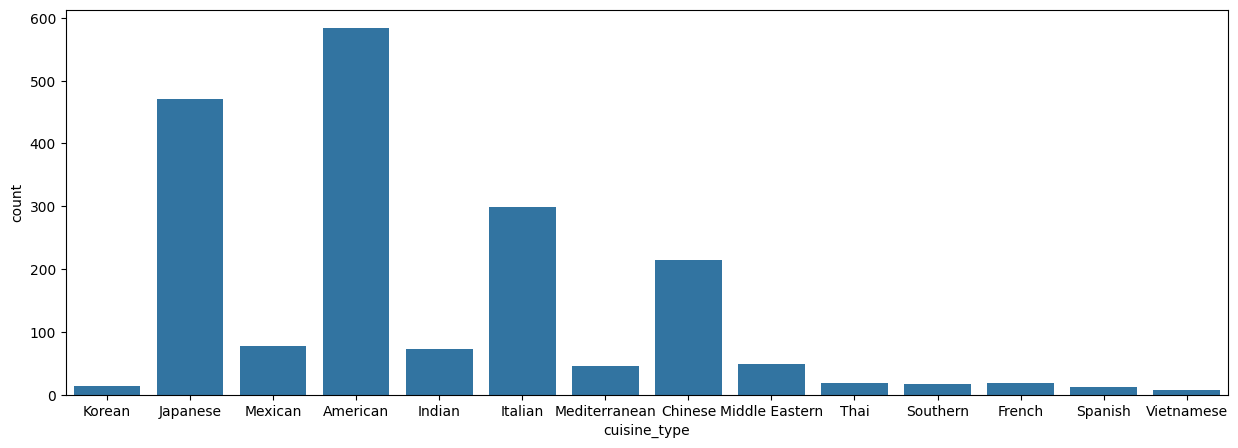

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

American, Japanese, and Italian cuisine are the most popular out of the 14 unique cuisine types.

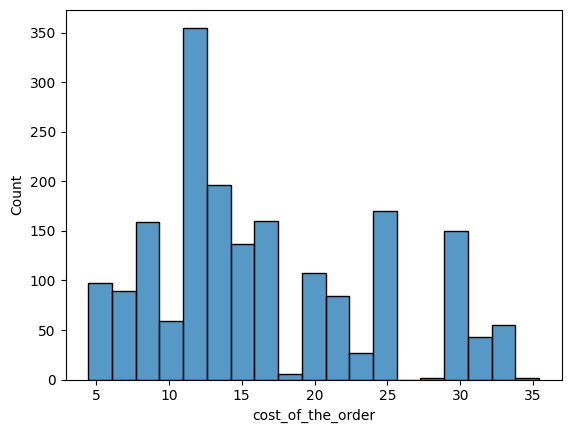

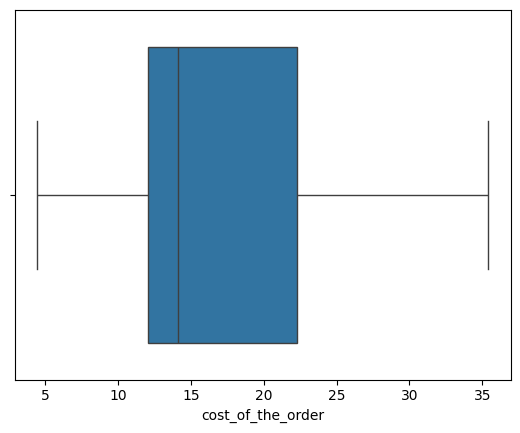

In [ ]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

Lower order costs typically trend higher.

In [ ]:
df['day_of_the_week'].nunique()

2

There are 2 unique days of the week. A weekday and a weekend.

<Axes: xlabel='day_of_the_week', ylabel='count'>

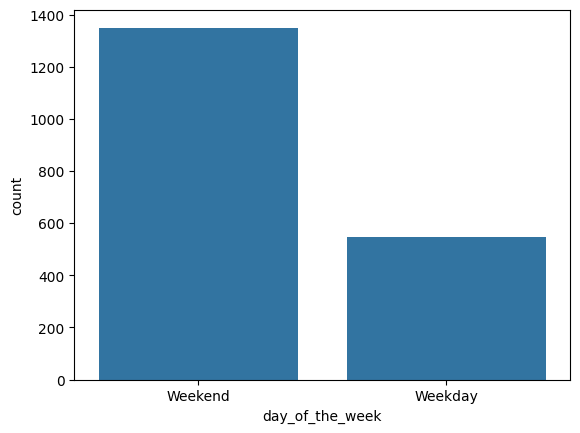

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week')

Weekends are busier than weekdays. This points to customers more likely to use the Foodhub app to order food during the weekend.

<Axes: xlabel='rating', ylabel='count'>

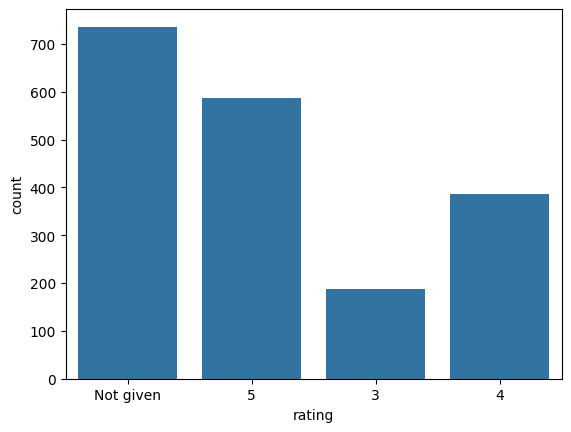

In [ ]:
sns.countplot(data = df, x = 'rating')

There are more not given ratings than all others. Possibly needs more initiative or promotions to increase ratings.

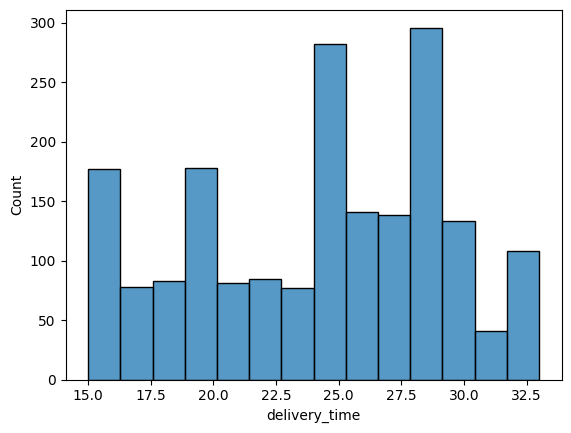

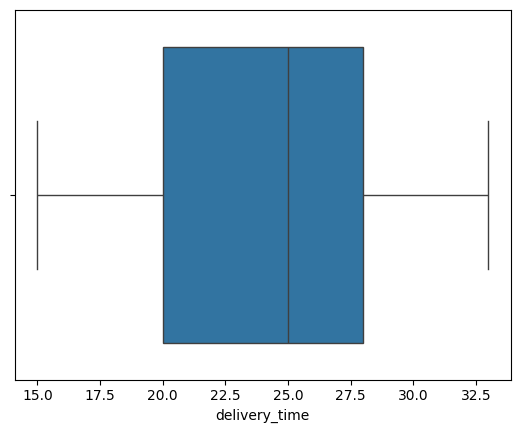

In [ ]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

The average delivery time is about 27 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:The top 5 restaurants in terms of the number of orders received are Shake Shack with 219 orders, The Meatball Shop with 132 orders, Blue Ribbon Sushi with 119 orders, Blue Ribbon Fried Chicken with 96 orders, and Parm with 68 orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
df_weekend = df[df['day_of_the_week'] == 'Weekend']
cuisine_counts_weekend = df_weekend['cuisine_type'].value_counts()
print(cuisine_counts_weekend)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64


#### Observations: The most popular cuisine on the weekend is American, followed by Japanese, and Italian.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
df_greater_than_20 = df[df['cost_of_the_order']>20]

print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations: About one third of all orders cost more than $20. Indicates many customers are making high value purchases. Could be an opportunity to upsell.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
mean_del_time = df['delivery_time'].mean()

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations: The average delivery time is about 24 minutes. Could be a competitive advantage. Delivery time is a crutial aspect of customer satisfaction.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations: The data suggests there are three frequent customers with IDs 52832, 47440, and 83287. With 13, 10, and 9 orders placed.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Cuisine vs Cost of the order

<ipython-input-34-32d638329f7e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')


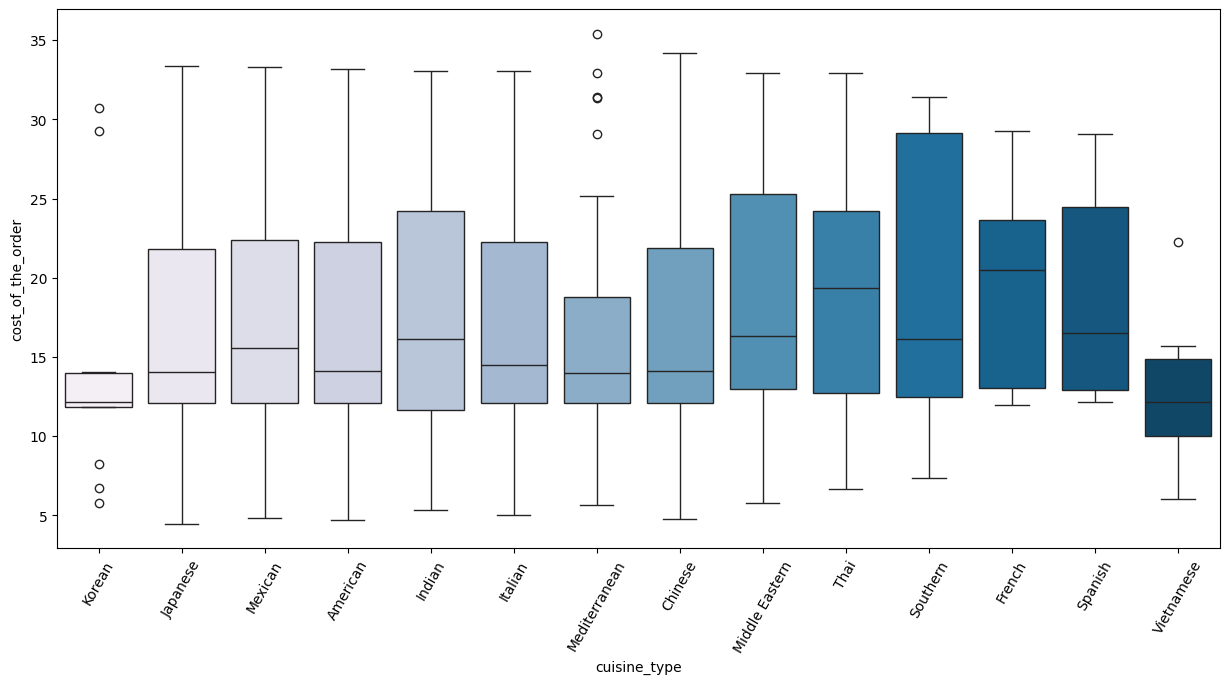

In [ ]:
# Write the code here
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

Cuisine vs Food preparation time

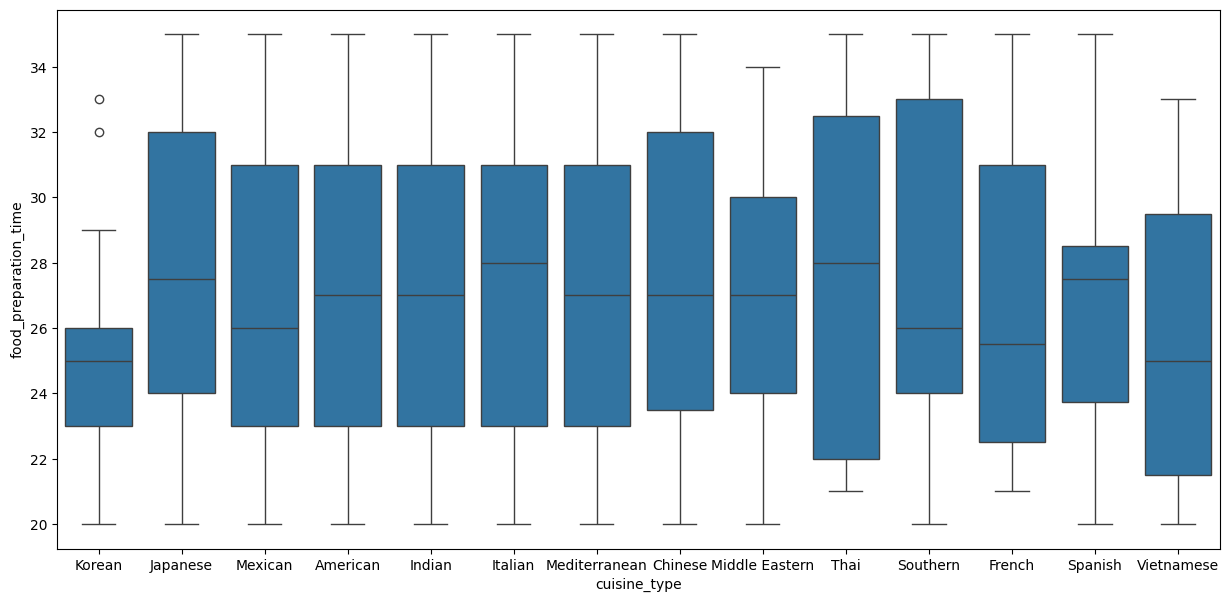

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df , x = "cuisine_type" , y = "food_preparation_time")
plt.show()

Day of the week vs Delivery time

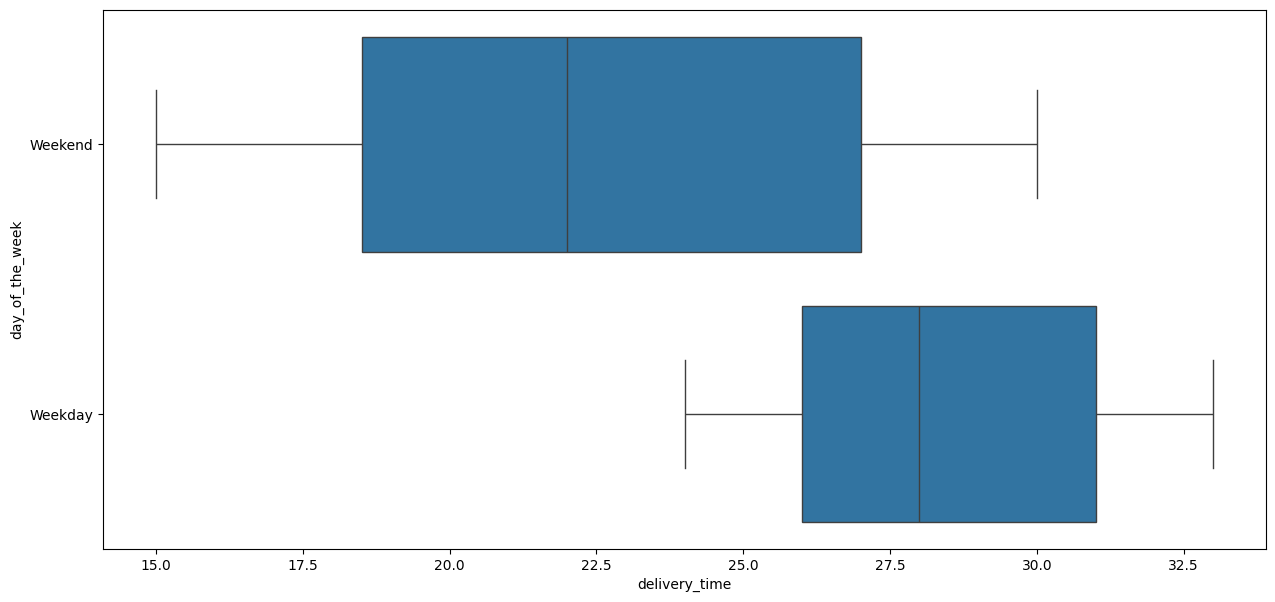

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df , x = "delivery_time" , y = "day_of_the_week")
plt.show()

Revenue generated by restaurant

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


Rating vs Delivery time

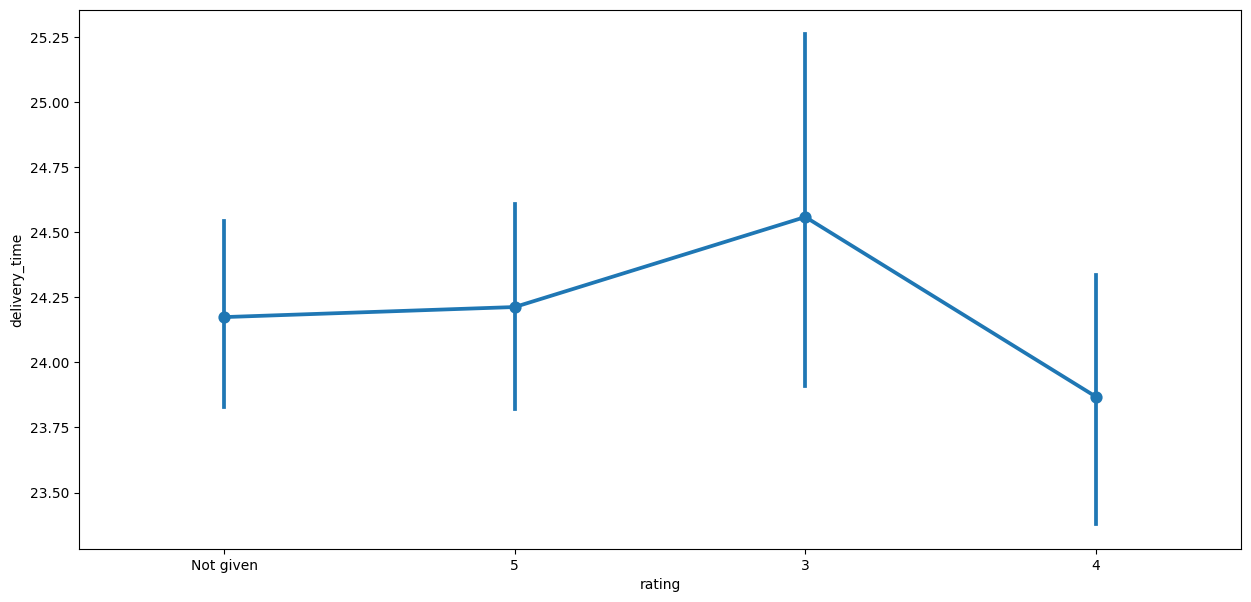

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

Rating vs Food preparation time

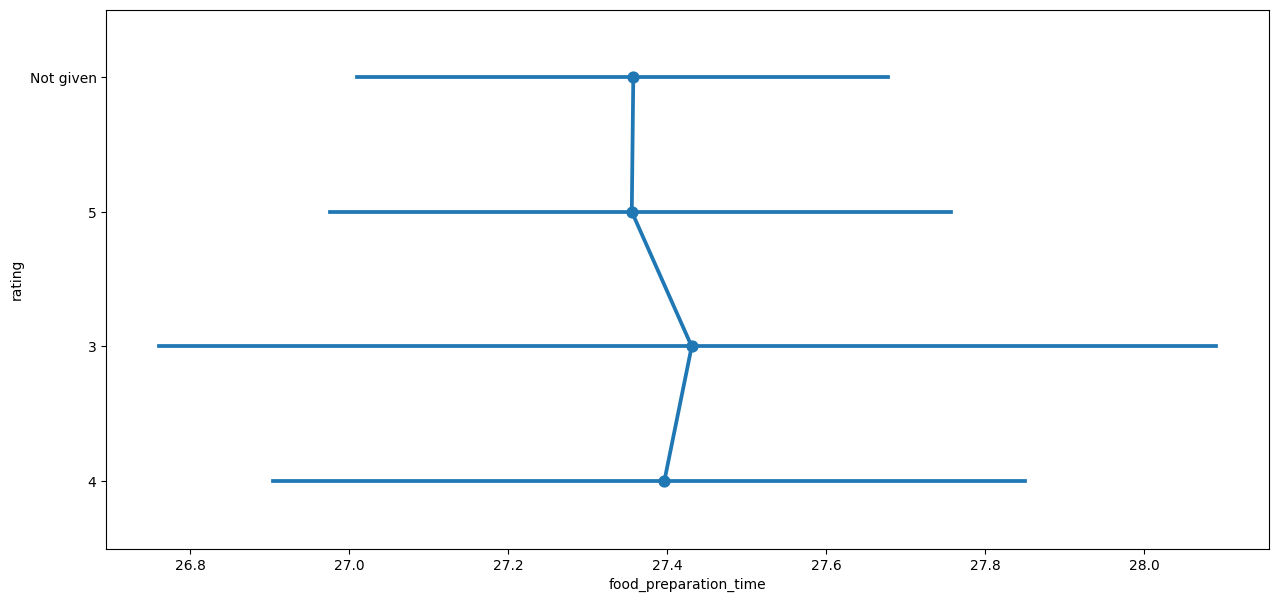

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(data=df , x = "food_preparation_time" , y = "rating")
plt.show()

Rating vs Cost of the order

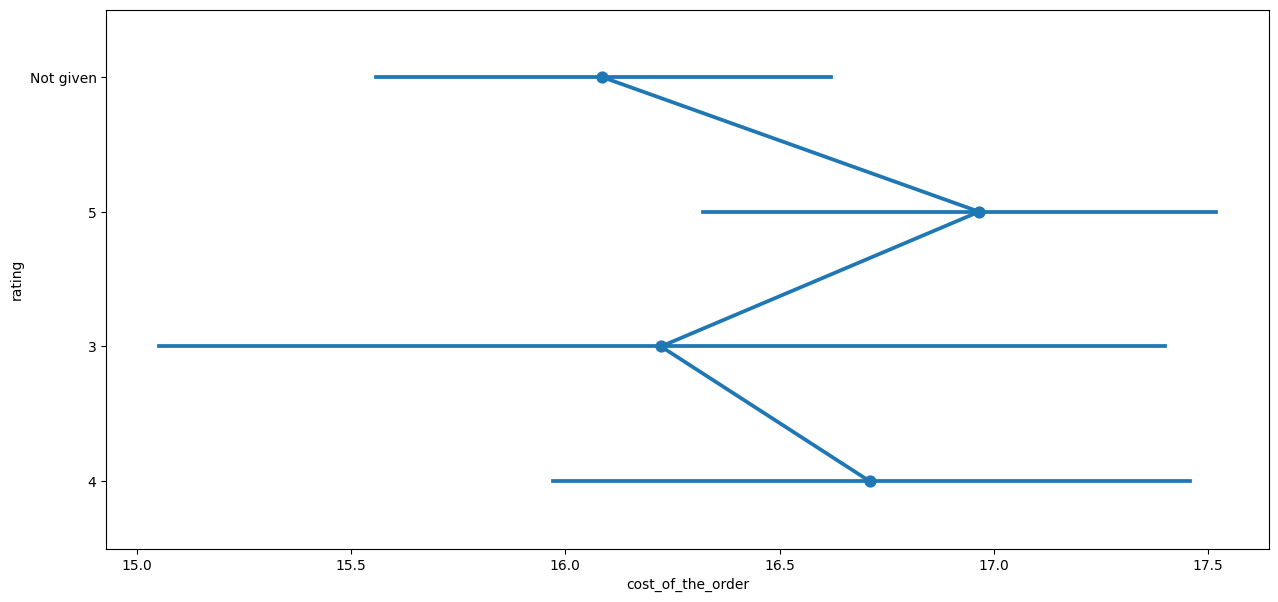

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(data=df , x = "cost_of_the_order" , y = "rating")
plt.show()

Correlation among variables

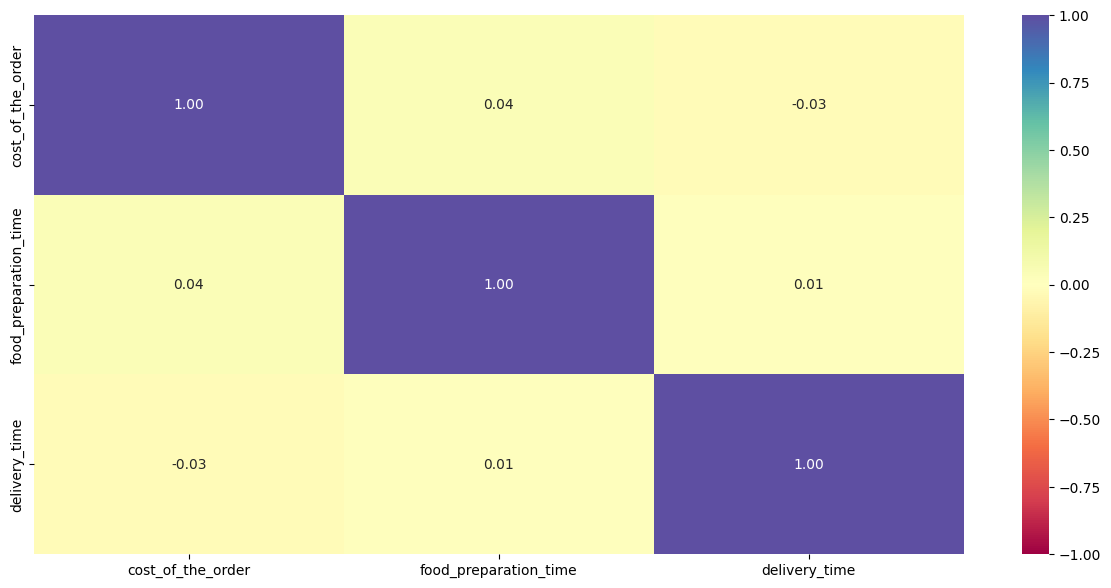

In [ ]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
rest_names = df_rating_count[df_rating_count['rating'] >50] ['restaurant_name']

df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


In [ ]:
df_rated = df[df['rating'] != 'Not given'].copy()

df_rated['rating'] = df_rated['rating'].astype('int')

df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


#### Observations: The restaurant with the highest rating is Shake Shack and the restaurant with the highest average is The Meatball Shop. These two restaurants could potentially attract more customers with a promotional offer.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


In [ ]:
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


#### Observations: This depicts revenue the company earned from restuarants. It would be interesting to see if there is any patterns or fluctuations with days of the week or cuisine types based off this data


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df_greater_than_60 = df[df['total_time'] >60]

print("The total number of orders that took more than 60 minutes to get get delivered is:", df_greater_than_60.shape[0])

percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders that took more than 60 minutes to get delivered:", round(percentage, 2),'%')


The total number of orders that took more than 60 minutes to get get delivered is: 200
Percentage of orders that took more than 60 minutes to get delivered: 10.54 %


#### Observations: From the time the order is placed, approximately 10.54% of all orders take more than 60 minutes to get delivered.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()), 'minutes')

The mean delivery time on weekdays is around 22 minutes
The mean delivery time on weekdays is around 28 minutes


#### Observations:The delivery time on weekends is generally faster compared to the delivery time on the weekdays. Many factors could come into play such as weather, traffic conditions, staffing, ect.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Foodhub is doing well in the online food delivery market. The demand is high, but there is room for further growth. Restaurants with higher ratings seem to be more popular. But the amount of unique customers and orders suggests the platform is utilized. This usually points towards the successs of a business like Foodhub.

### Recommendations:

*  Capitalize on the differences and reductions of delivery times. Investigate why 10% of the orders are taking over an hour to be delivered.

*  Promote higher rated restaurants to inprove customer satisfaction. As well as diversifying restaurant and cuisine options.

*  Foodhub might want to investigate why some resturants are receiving fewer orders. Multiple reasons such as price, delivery time, customer service, and cuisine type all could have an impact on the popularity and future orders.

---